In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# df=pd.read_csv("data_updated080524_b1b2_YJZtransformed_NeoBin.tsv",sep="\t")
df=pd.read_csv("input_data_subgroupanalysis_forbatcheffect.txt", sep="\t")

In [50]:
# data=df[['NeoGroup',
#          'zAge','zStage','zTumorGrade','zTumourSize',
#          'zESTIMATE','zIMPRES','zBindea_full','zExpanded_IFNg',
#          'zBindea_CD8','zBindea_Cytotoxic','zCIBERSORT_CD8']]

data=df[['Batch','BatchFusGroup','BatchSNVgroup',
         'zESTIMATE','zIMPRES','zGSVA_BindeaFull','zGSVA_ExpandedIFNg',
         'zGSVA_CD8','zGSVA_Cytotoxic','zCIBERSORT_CD8']]

C:\Users\minhui.tan\AppData\Local\Temp\ipykernel_29096\218717623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[group_column] = pd.Categorical(data[group_column], categories=groups, ordered=True)


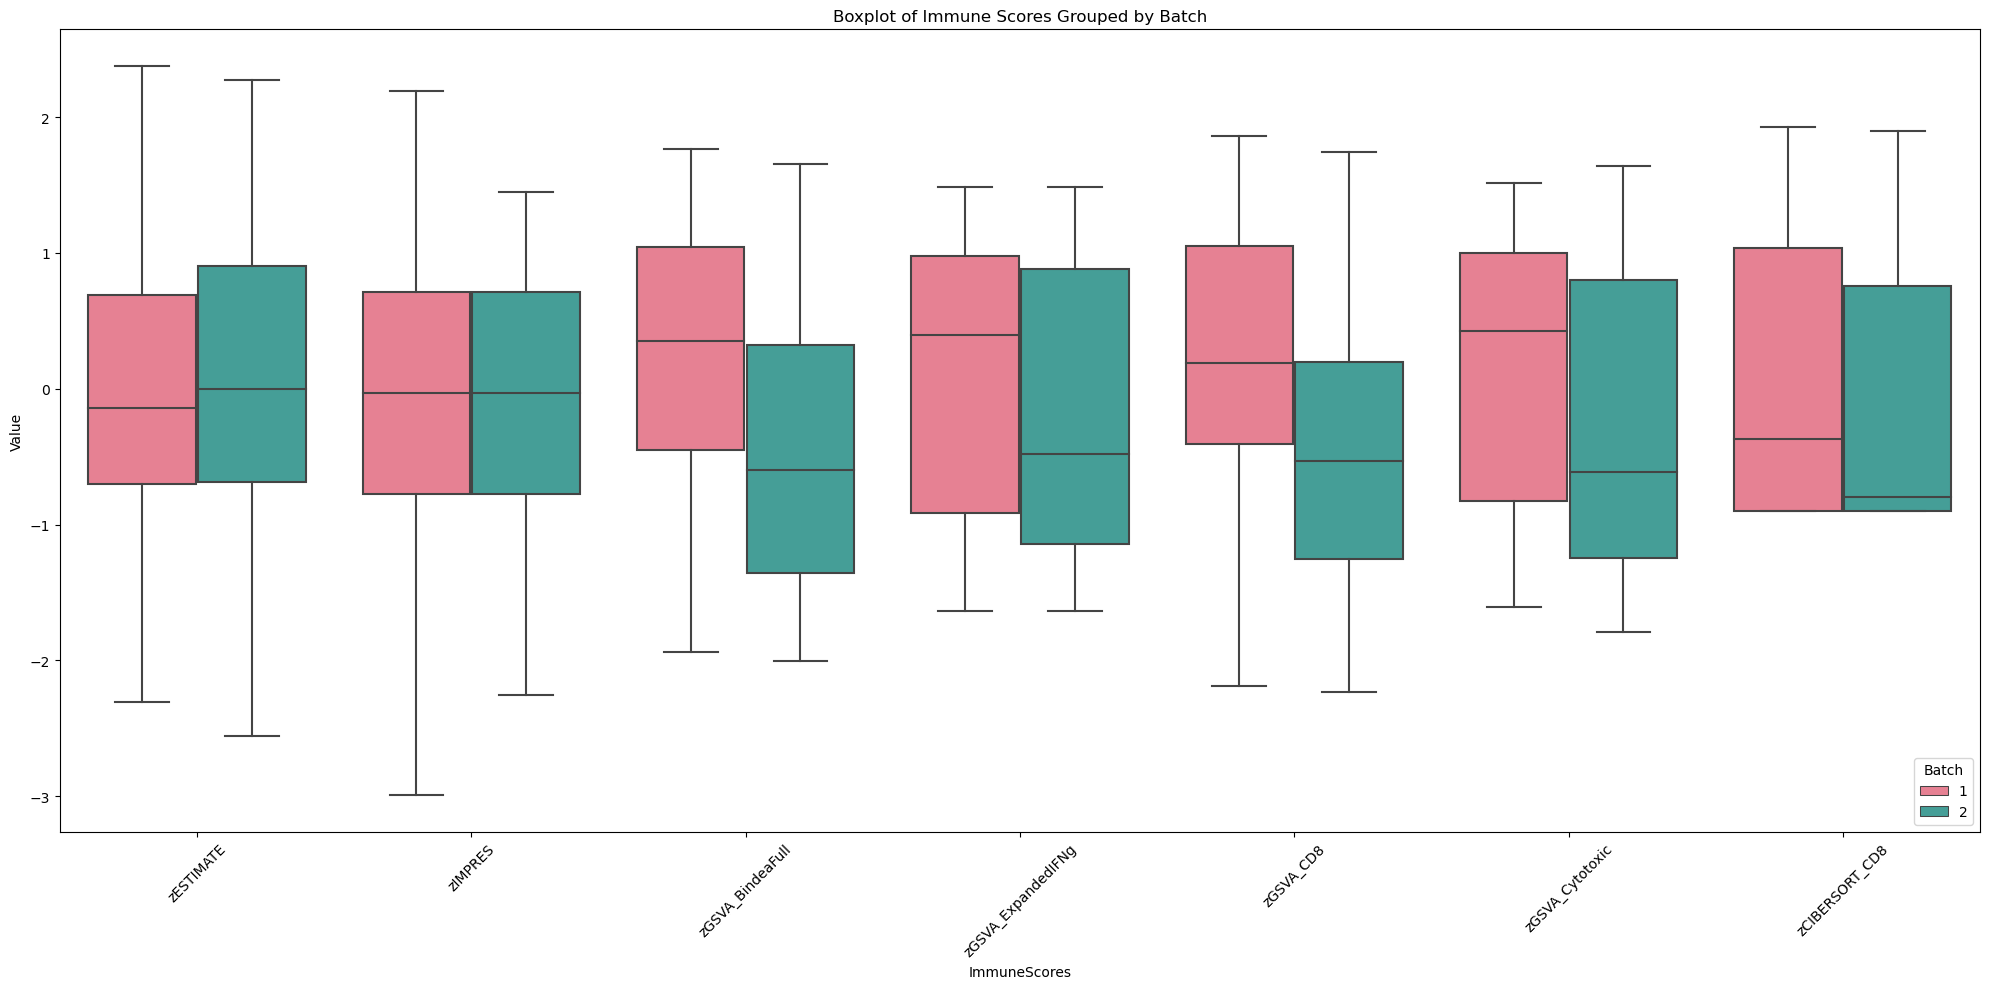

In [52]:
#this is to plot boxplot for batch+fusion/snv count groups!
from scipy.stats import ttest_ind
# import ace_tools as tools


# Define the columns and groupings
columns_to_plot = data.columns[3:]
group_column = 'Batch'

# Extracting unique groups + order them by fus/snv groups
groups = sorted(data[group_column].unique())
data[group_column] = pd.Categorical(data[group_column], categories=groups, ordered=True)

# Creating a single figure with all the boxplots combined and different colors
plt.figure(figsize=(20, 10))

# Melting the data to have a long format for seaborn boxplot
melted_data = data.melt(id_vars=[group_column], value_vars=columns_to_plot, var_name='ImmuneScores', value_name='Value')

# Creating the combined boxplot with different colors for each group
palette = sns.color_palette("husl", len(groups))
sns.boxplot(x='ImmuneScores', y='Value', hue=group_column, data=melted_data, palette=palette)
plt.title('Boxplot of Immune Scores Grouped by Batch')
plt.xticks(rotation=45)
# plt.xlabel('Variables')
# plt.ylabel('Immune Scores')
plt.legend(title='Batch', loc='lower right', bbox_to_anchor=(1, 0))
plt.tight_layout()

# Show the plot
plt.show()

# # Initializing a dictionary to store the t-test results
# t_test_results = {column: {} for column in columns_to_plot}

# # Performing t-test between each pair of groups for each column
# for column in columns_to_plot:
#     for i in range(len(groups)):
#         for j in range(i+1, len(groups)):
#             group1 = data[data[group_column] == groups[i]][column]
#             group2 = data[data[group_column] == groups[j]][column]
#             t_stat, p_val = ttest_ind(group1, group2)
#             t_test_results[column][f'{groups[i]} vs {groups[j]}'] = p_val

# # Converting the results to a DataFrame for better visualization
# t_test_df = pd.DataFrame(t_test_results).T
# t_test_df = t_test_df.reset_index().rename(columns={'index': 'Variable'})

# tools.display_dataframe_to_user(name="T-test Results for BatchSNVgroup", dataframe=t_test_df)


In [54]:
#this is to plot for only batch grouped; variables = both neo counts + all immune scores
df2=pd.read_csv("input_data2_subgroupanalysis_forbatcheffect.txt", sep="\t")

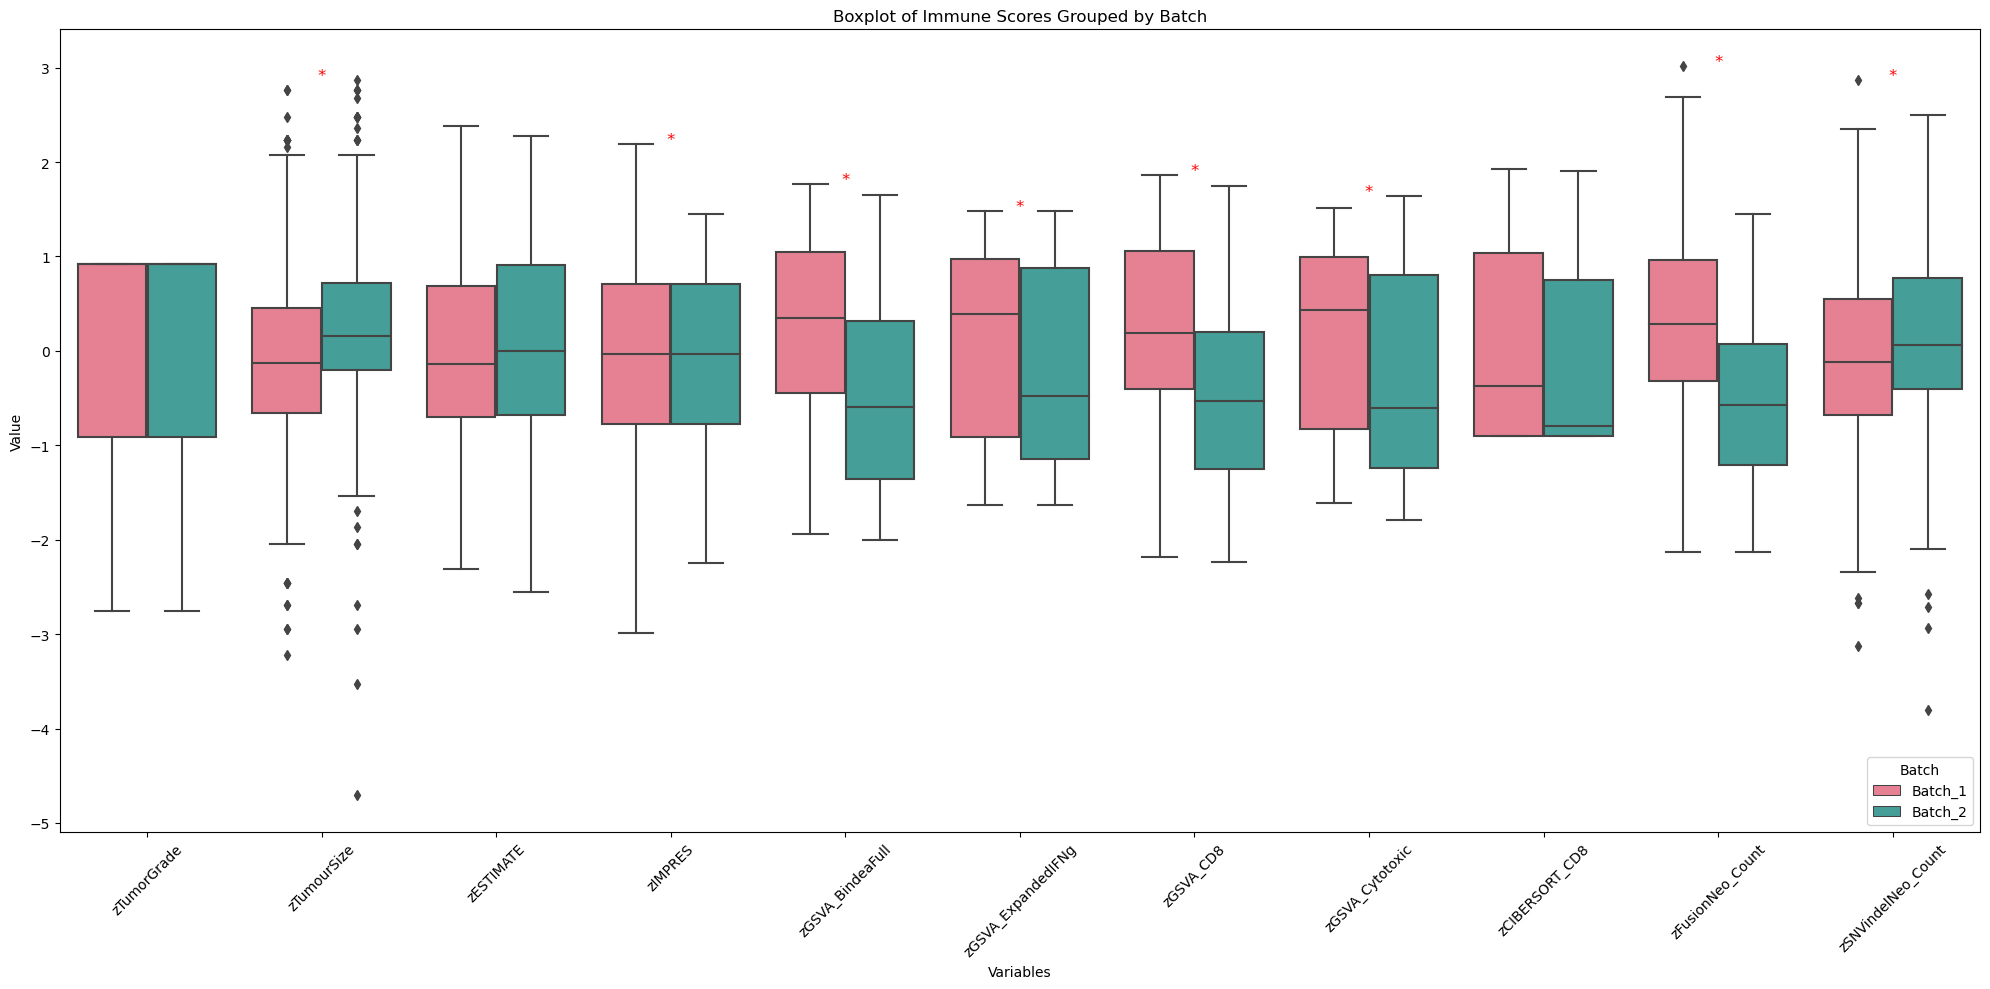

In [63]:
# Define the columns and groupings
columns_to_plot = df2.columns[1:]
group_column = 'Batch'

# Extracting unique groups + order them by fus/snv groups
groups = sorted(df2[group_column].unique())
df2[group_column] = pd.Categorical(df2[group_column], categories=groups, ordered=True)

# Creating a single figure with all the boxplots combined and different colors
plt.figure(figsize=(20, 10))

# Melting the data to have a long format for seaborn boxplot
melted_data = df2.melt(id_vars=[group_column], value_vars=columns_to_plot, var_name='Variables', value_name='Value')

# Creating the combined boxplot with different colors for each group
palette = sns.color_palette("husl", len(groups))
sns.boxplot(x='Variables', y='Value', hue=group_column, data=melted_data, palette=palette)


# Perform t-test between the groups for each variable
significant_vars = []
for col in df2.columns[1:]:
    group1 = df2[df2['Batch'] == groups[0]][col]
    group2 = df2[df2['Batch'] == groups[1]][col]
    t_stat, p_val = ttest_ind(group1, group2)
    if p_val < 0.05:
        significant_vars.append(col)
        # Annotate significant variables
        plt.text(df2.columns.get_loc(col) - 1, df2[col].max(), '*', fontsize=12, color='red', ha='center')

plt.title('Boxplot of Immune Scores Grouped by Batch')
plt.xticks(rotation=45)
# plt.xlabel('Variables')
# plt.ylabel('Immune Scores')
plt.legend(title='Batch', loc='lower right', bbox_to_anchor=(1, 0))
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
df2.columns

Index(['Batch', 'zTumorGrade', 'zTumourSize', 'zESTIMATE', 'zIMPRES',
       'zGSVA_BindeaFull', 'zGSVA_ExpandedIFNg', 'zGSVA_CD8',
       'zGSVA_Cytotoxic', 'zCIBERSORT_CD8', 'zFusionNeo_Count',
       'zSNVindelNeo_Count'],
      dtype='object')

In [64]:
df

,Batch,binnedESTIMATE,binnedIMPRES,binnedGSVA_BindeaFull,binnedGSVA_ExpandedIFNg,binnedGSVA_CD8,binnedGSVA_Cytotoxic,binnedCIBERSORT_CD8,zESTIMATE,zIMPRES,zGSVA_BindeaFull,zGSVA_ExpandedIFNg,zGSVA_CD8,zGSVA_Cytotoxic,zCIBERSORT_CD8,binnedFNeo_Count,binnedSNeo_Count,NeoGroup,BatchFusGroup,BatchSNVgroup
0,1,2,1,2,1,3,1,1,-0.868040,-0.770997,-0.456900,-1.455764,-0.147305,-1.481973,-0.896559,2,2,4,b1f2,b1s2
1,1,3,3,3,3,3,3,4,0.136711,0.709590,-0.164268,-0.393528,-0.208664,0.359358,1.435808,1,1,1,b1f1,b1s1
2,1,2,1,3,2,5,3,3,-0.700277,-1.511291,0.204620,-0.707626,1.134738,-0.085535,0.127692,1,1,1,b1f1,b1s1
3,1,4,3,3,5,4,4,4,0.887322,0.709590,0.085787,1.162719,0.370836,0.800318,1.547245,1,2,3,b1f1,b1s2
4,1,2,3,2,3,2,3,3,-0.386590,0.709590,-0.568107,0.277577,-0.394689,-0.174435,-0.030729,2,2,4,b1f2,b1s2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,2,4,4,5,4,5,5,4,0.450485,1.449884,1.060910,0.979660,1.434390,1.123072,1.803437,1,2,3,b2f1,b2s2
647,2,1,1,1,1,1,1,1,-0.969158,-0.770997,-1.606140,-1.466201,-1.484539,-1.491807,-0.896559,1,2,3,b2f1,b2s2
648,2,5,3,4,3,4,5,4,0.963996,0.709590,0.802275,0.519115,0.950012,1.238721,1.075960,1,1,1,b2f1,b2s1
649,2,3,2,4,3,4,3,3,0.112926,-0.030703,0.561751,-0.015980,0.263377,0.019100,-0.037993,1,1,1,b2f1,b2s1


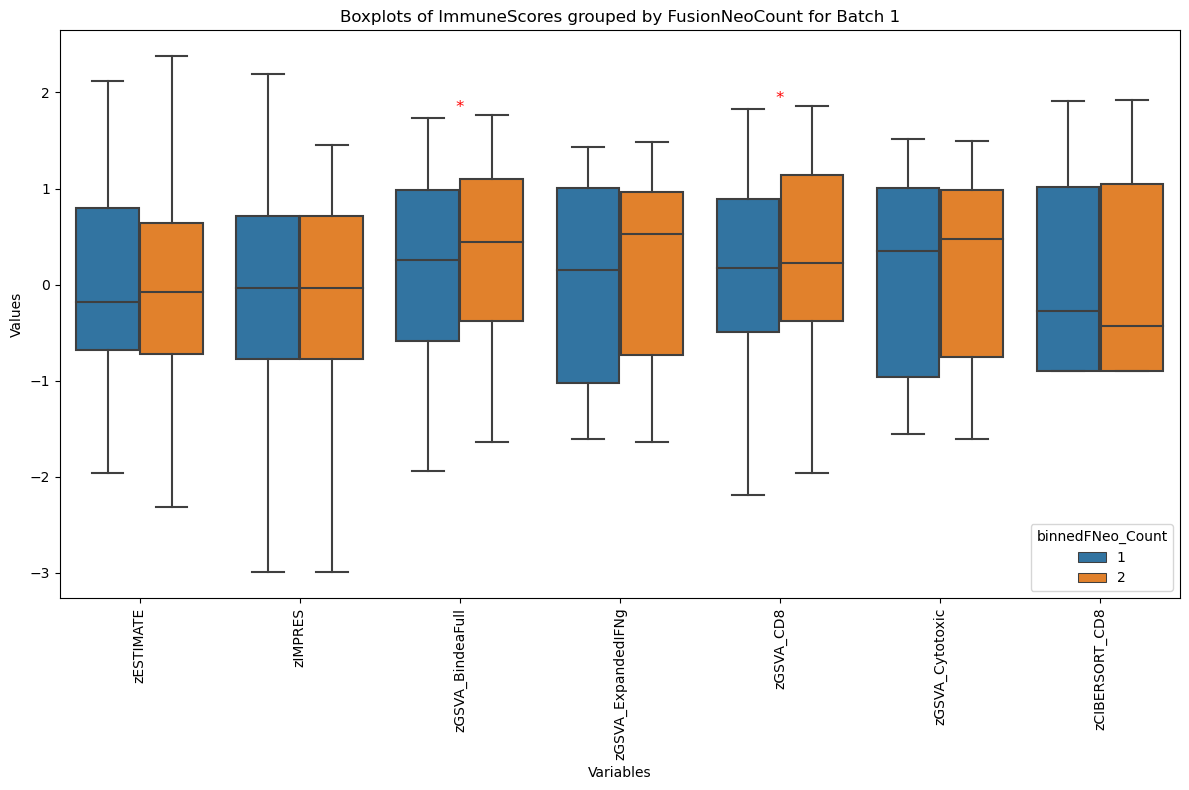

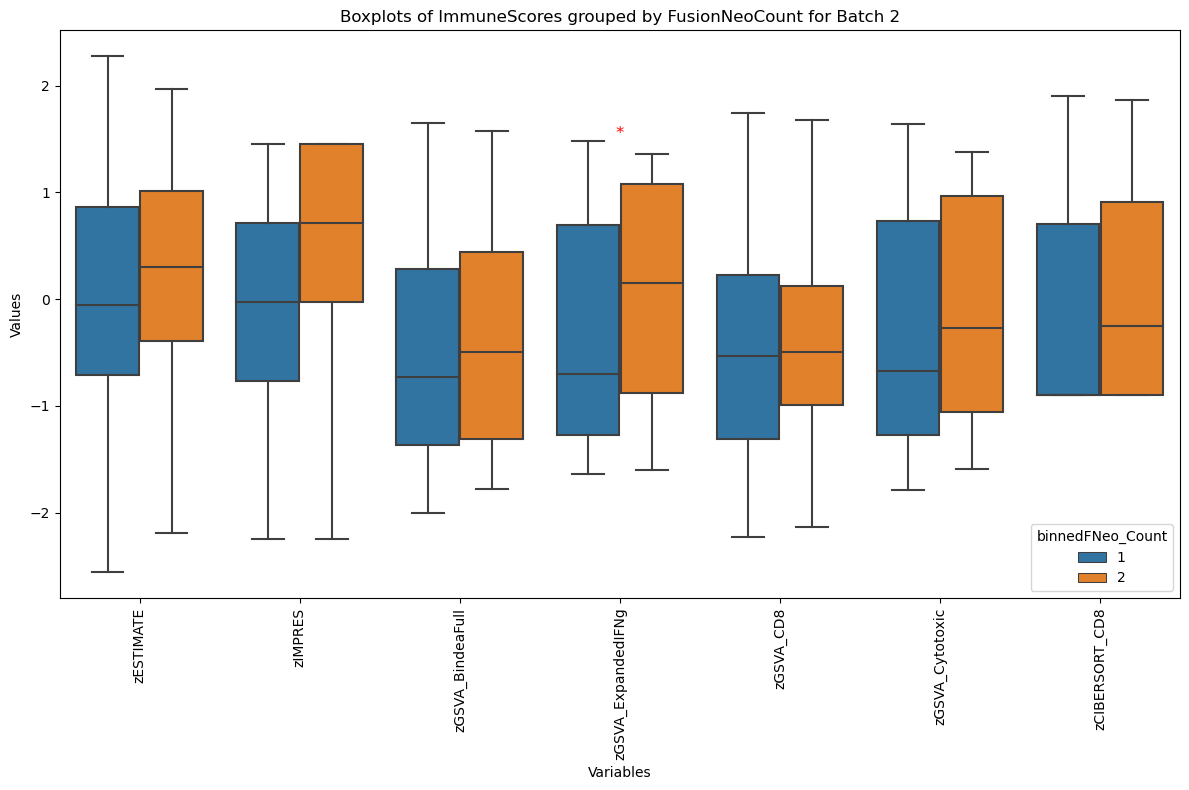

In [73]:
#now do as jw suggested - do fus high vs fus low to compare immune scors. 
#therefore very similar code to above, except that we show the results in two boxplot
#one for batch1, one for batch2

# Load the new dataset
file_path_new = 'input_data_subgroupanalysis_forbatcheffect.txt'
df_new = pd.read_csv(file_path_new, delimiter='\t')

# # Define the columns for boxplots (before including p-value indicator)
columns_for_boxplots = df_new.columns[8:15].tolist()  # Columns 9-15
group_column = df_new.columns[15]  # Column 16

# Prepare two subsets based on 'Batch' values 1 and 2
df_batch_1 = df_new[df_new['Batch'] == 1]
df_batch_2 = df_new[df_new['Batch'] == 2]


# Function to add significance asterisks based on p-values
def add_significance_asterisks(ax, p_values, cols):
    for i, col in enumerate(cols):
        p_val = p_values[col]
        if p_val < 0.001:
            significance = '***'
        elif p_val < 0.005:
            significance = '**'
        elif p_val < 0.05:
            significance = '*'
        else:
            significance = ''
        ax.text(i, df_new[col].max(), significance, ha='center', va='bottom', color='red', fontsize=12)

# Function to calculate t-test p-values for each variable
def calculate_t_test_p_values(df, group_col, cols):
    groups = df[group_col].unique()
    p_values = {}
    for col in cols:
        group1 = df[df[group_col] == groups[0]][col]
        group2 = df[df[group_col] == groups[1]][col]
        t_stat, p_val = ttest_ind(group1, group2)
        p_values[col] = p_val
    return p_values

# Calculate p-values for Batch 1
p_values_batch_1 = calculate_t_test_p_values(df_batch_1, group_column, columns_for_boxplots)

# Initialize the figure for the first plot (Batch 1) with significance asterisks
plt.figure(figsize=(12, 8))
ax1 = sns.boxplot(data=df_batch_1.melt(id_vars=[group_column], value_vars=columns_for_boxplots, var_name='Variables', value_name='Values'), 
                 x='Variables', y='Values', hue=group_column, showfliers=False)
add_significance_asterisks(ax1, p_values_batch_1, columns_for_boxplots)
plt.title('Boxplots of ImmuneScores grouped by FusionNeoCount for Batch 1')
plt.xticks(rotation=90)
plt.legend(title=group_column, bbox_to_anchor=(1, 0), loc='lower right')
plt.tight_layout()
plt.show()

# Calculate p-values for Batch 2
p_values_batch_2 = calculate_t_test_p_values(df_batch_2, group_column, columns_for_boxplots)

# Initialize the figure for the second plot (Batch 2) with significance asterisks
plt.figure(figsize=(12, 8))
ax2 = sns.boxplot(data=df_batch_2.melt(id_vars=[group_column], value_vars=columns_for_boxplots, var_name='Variables', value_name='Values'), 
                 x='Variables', y='Values', hue=group_column, showfliers=False)
add_significance_asterisks(ax2, p_values_batch_2, columns_for_boxplots)
plt.title('Boxplots of ImmuneScores grouped by FusionNeoCount for Batch 2')
plt.xticks(rotation=90)
plt.legend(title=group_column, bbox_to_anchor=(1, 0), loc='lower right')
plt.tight_layout()
plt.show()




# # Initialize the figure for the first plot (Batch 1)
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df_batch_1.melt(id_vars=[group_column], value_vars=columns_for_boxplots, var_name='Variables', value_name='Values'), 
#             x='Variables', y='Values', hue=group_column, showfliers=False)
# plt.title('Boxplots of Variables (Columns 9-15) grouped by Column 16 for Batch 1')
# plt.xticks(rotation=90)
# plt.legend(title=group_column, bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# # Initialize the figure for the second plot (Batch 2)
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df_batch_2.melt(id_vars=[group_column], value_vars=columns_for_boxplots, var_name='Variables', value_name='Values'), 
#             x='Variables', y='Values', hue=group_column, showfliers=False)
# plt.title('Boxplots of Variables (Columns 9-15) grouped by Column 16 for Batch 2')
# plt.xticks(rotation=90)
# plt.legend(title=group_column, bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


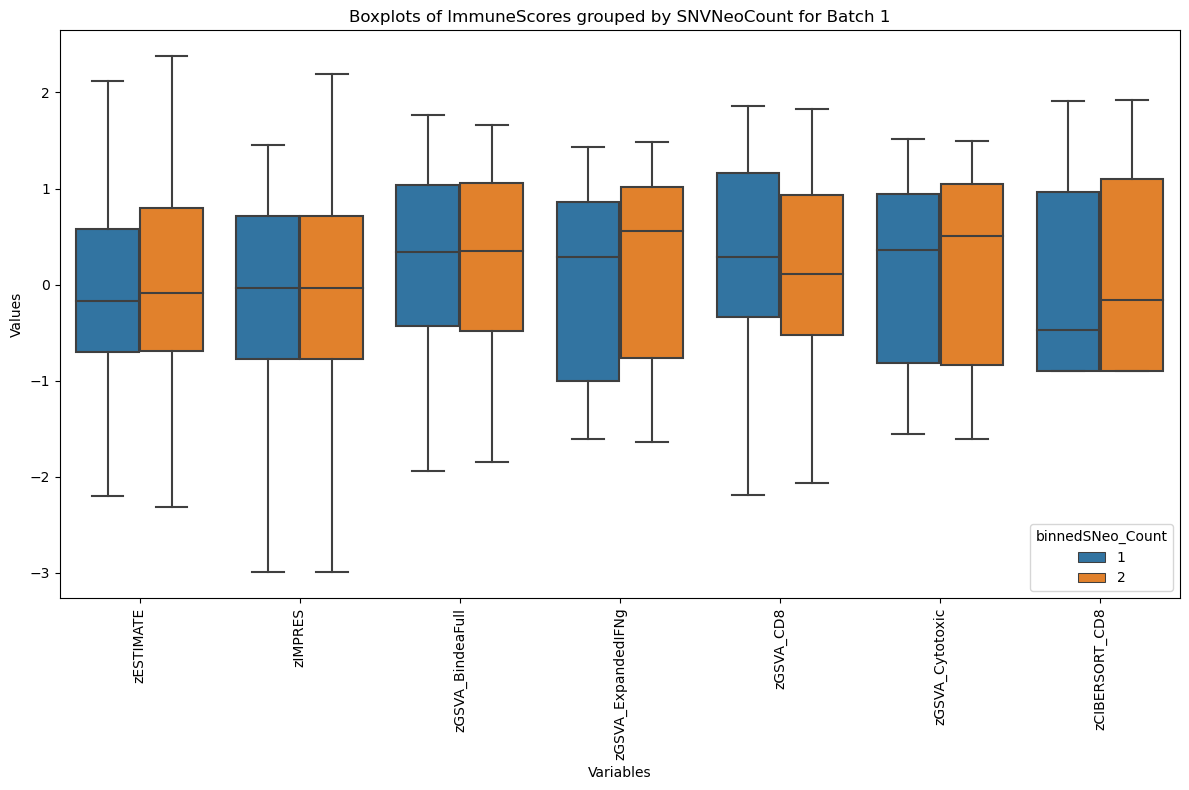

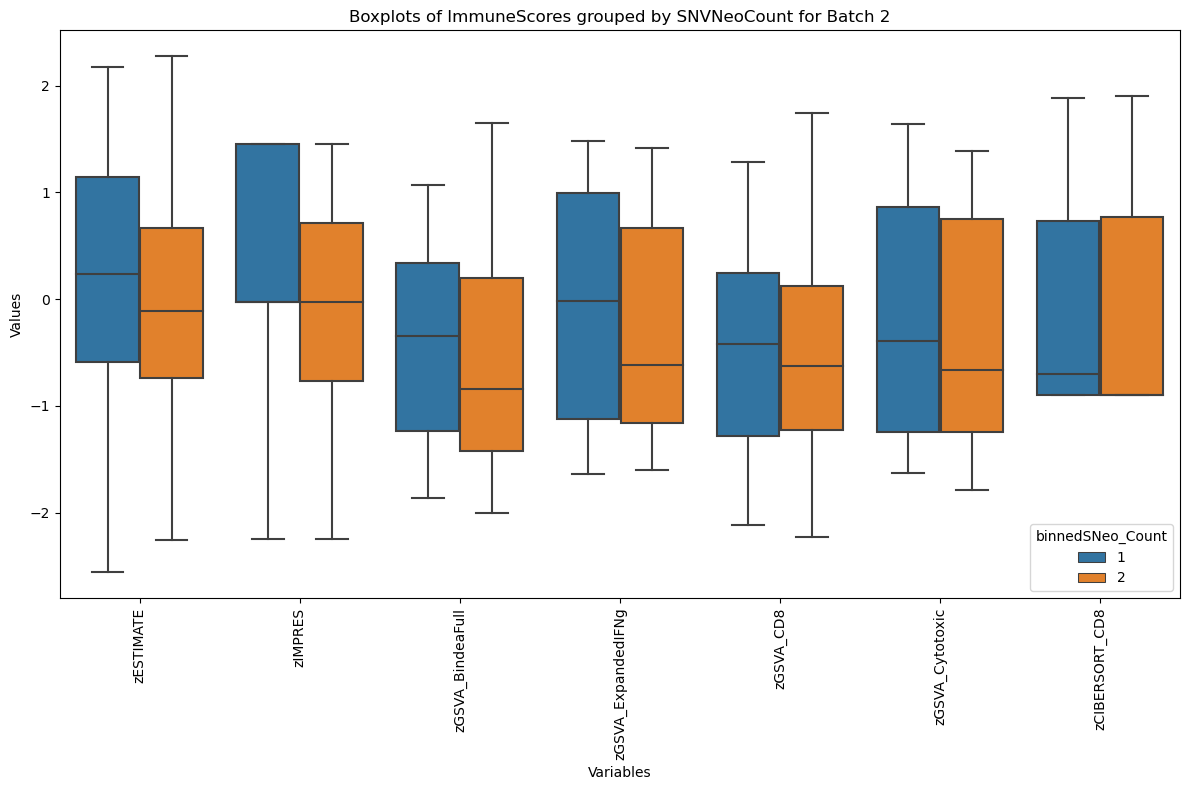

In [74]:
#now do as jw suggested - do fus high vs fus low to compare immune scors. 
#therefore very similar code to above, except that we show the results in two boxplot
#one for batch1, one for batch2

# Load the new dataset
file_path_new = 'input_data_subgroupanalysis_forbatcheffect.txt'
df_new = pd.read_csv(file_path_new, delimiter='\t')

# # Define the columns for boxplots (before including p-value indicator)
columns_for_boxplots = df_new.columns[8:15].tolist()  # Columns 9-15
group_column = df_new.columns[16]  # Column 17 aka SNV counts

# Prepare two subsets based on 'Batch' values 1 and 2
df_batch_1 = df_new[df_new['Batch'] == 1]
df_batch_2 = df_new[df_new['Batch'] == 2]


# Function to add significance asterisks based on p-values
def add_significance_asterisks(ax, p_values, cols):
    for i, col in enumerate(cols):
        p_val = p_values[col]
        if p_val < 0.001:
            significance = '***'
        elif p_val < 0.005:
            significance = '**'
        elif p_val < 0.05:
            significance = '*'
        else:
            significance = ''
        ax.text(i, df_new[col].max(), significance, ha='center', va='bottom', color='red', fontsize=12)

# Function to calculate t-test p-values for each variable
def calculate_t_test_p_values(df, group_col, cols):
    groups = df[group_col].unique()
    p_values = {}
    for col in cols:
        group1 = df[df[group_col] == groups[0]][col]
        group2 = df[df[group_col] == groups[1]][col]
        t_stat, p_val = ttest_ind(group1, group2)
        p_values[col] = p_val
    return p_values

# Calculate p-values for Batch 1
p_values_batch_1 = calculate_t_test_p_values(df_batch_1, group_column, columns_for_boxplots)

# Initialize the figure for the first plot (Batch 1) with significance asterisks
plt.figure(figsize=(12, 8))
ax1 = sns.boxplot(data=df_batch_1.melt(id_vars=[group_column], value_vars=columns_for_boxplots, var_name='Variables', value_name='Values'), 
                 x='Variables', y='Values', hue=group_column, showfliers=False)
add_significance_asterisks(ax1, p_values_batch_1, columns_for_boxplots)
plt.title('Boxplots of ImmuneScores grouped by SNVNeoCount for Batch 1')
plt.xticks(rotation=90)
plt.legend(title=group_column, bbox_to_anchor=(1, 0), loc='lower right')
plt.tight_layout()
plt.show()

# Calculate p-values for Batch 2
p_values_batch_2 = calculate_t_test_p_values(df_batch_2, group_column, columns_for_boxplots)

# Initialize the figure for the second plot (Batch 2) with significance asterisks
plt.figure(figsize=(12, 8))
ax2 = sns.boxplot(data=df_batch_2.melt(id_vars=[group_column], value_vars=columns_for_boxplots, var_name='Variables', value_name='Values'), 
                 x='Variables', y='Values', hue=group_column, showfliers=False)
add_significance_asterisks(ax2, p_values_batch_2, columns_for_boxplots)
plt.title('Boxplots of ImmuneScores grouped by SNVNeoCount for Batch 2')
plt.xticks(rotation=90)
plt.legend(title=group_column, bbox_to_anchor=(1, 0), loc='lower right')
plt.tight_layout()
plt.show()




# # Initialize the figure for the first plot (Batch 1)
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df_batch_1.melt(id_vars=[group_column], value_vars=columns_for_boxplots, var_name='Variables', value_name='Values'), 
#             x='Variables', y='Values', hue=group_column, showfliers=False)
# plt.title('Boxplots of Variables (Columns 9-15) grouped by Column 16 for Batch 1')
# plt.xticks(rotation=90)
# plt.legend(title=group_column, bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# # Initialize the figure for the second plot (Batch 2)
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df_batch_2.melt(id_vars=[group_column], value_vars=columns_for_boxplots, var_name='Variables', value_name='Values'), 
#             x='Variables', y='Values', hue=group_column, showfliers=False)
# plt.title('Boxplots of Variables (Columns 9-15) grouped by Column 16 for Batch 2')
# plt.xticks(rotation=90)
# plt.legend(title=group_column, bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()
